In [37]:
# Dependencies
import pandas as pd
import numpy as np
import requests
import json
from pprint import pprint
from citipy import citipy
import time
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Google API Key
from config import (gkey,weather_api_key)


## Generate Cities List

In [38]:
lat= np.random.uniform(-90, 90, 1500)
lng= np.random.uniform(-180, 180, 1500)
lat_lng = list(zip(lat,lng))
#print(lat_lng)

city_list = []
lat=[]
lng=[]

for coordinate in lat_lng:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    #print(city)
    if city not in city_list:
        city_list.append(city)

print(len(city_list))

650


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [39]:
#api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
city_name=[]
lat=[]
lng=[]
max_temp=[]
humidity=[]
cloudiness=[]
wind_speed=[]
country=[]
date=[]

base_url="https://api.openweathermap.org/data/2.5/weather?units=imperial&"
counter=0
set_counter = 1

print("Beginning Data Retrieval...")
print("----------------------------")

for city in city_list:
    counter=counter+1
    if counter==50:
        time.sleep(60)
        counter=0
        set_counter=set_counter+1
        
    query_url=f'{base_url}q={city}&appid={weather_api_key}'
    response_json=requests.get(query_url).json()
    print(f"Processing record {counter} of Set{set_counter} | {city} ")
    #pprint(response_json)
    try:
        max_temp.append(response_json['main']['temp_max'])
        humidity.append(response_json['main']['humidity'])
        cloudiness.append(response_json['clouds']['all'])
        wind_speed.append(response_json['wind']['speed'])
        country.append(response_json['sys']['country'])
        date.append(response_json['dt'])
        city_name.append(response_json['name'])
        lat.append(response_json['coord']['lat'])
        lng.append(response_json['coord']['lon'])
         
    except KeyError:
        print(f"{city} data not found. Skipping...")


Beginning Data Retrieval...
----------------------------
Processing record 1 of Set1 | punta arenas 
Processing record 2 of Set1 | tiznit 
Processing record 3 of Set1 | saskylakh 
Processing record 4 of Set1 | ushuaia 
Processing record 5 of Set1 | marcona 
marcona data not found. Skipping...
Processing record 6 of Set1 | nikolskoye 
Processing record 7 of Set1 | hermanus 
Processing record 8 of Set1 | mabai 
Processing record 9 of Set1 | talcahuano 
Processing record 10 of Set1 | rawson 
Processing record 11 of Set1 | tsihombe 
tsihombe data not found. Skipping...
Processing record 12 of Set1 | new norfolk 
Processing record 13 of Set1 | victoria 
Processing record 14 of Set1 | butaritari 
Processing record 15 of Set1 | yellowknife 
Processing record 16 of Set1 | chapais 
Processing record 17 of Set1 | banjarmasin 
Processing record 18 of Set1 | mount darwin 
Processing record 19 of Set1 | tongliao 
Processing record 20 of Set1 | gazi 
Processing record 21 of Set1 | cidreira 
Processi

Processing record 36 of Set4 | saint anthony 
Processing record 37 of Set4 | port alfred 
Processing record 38 of Set4 | iralaya 
Processing record 39 of Set4 | narsaq 
Processing record 40 of Set4 | aykhal 
Processing record 41 of Set4 | tiksi 
Processing record 42 of Set4 | iqaluit 
Processing record 43 of Set4 | kaduna 
Processing record 44 of Set4 | codrington 
Processing record 45 of Set4 | grindavik 
Processing record 46 of Set4 | haapiti 
Processing record 47 of Set4 | kasongo-lunda 
Processing record 48 of Set4 | bayshore gardens 
Processing record 49 of Set4 | vaitupu 
vaitupu data not found. Skipping...
Processing record 0 of Set5 | wahran 
wahran data not found. Skipping...
Processing record 1 of Set5 | misratah 
Processing record 2 of Set5 | taoudenni 
Processing record 3 of Set5 | sladkovo 
Processing record 4 of Set5 | sechura 
Processing record 5 of Set5 | ornskoldsvik 
Processing record 6 of Set5 | harnosand 
Processing record 7 of Set5 | medicine hat 
Processing record

Processing record 17 of Set8 | saint-joseph 
Processing record 18 of Set8 | kloulklubed 
Processing record 19 of Set8 | khonuu 
khonuu data not found. Skipping...
Processing record 20 of Set8 | dunedin 
Processing record 21 of Set8 | san cristobal 
Processing record 22 of Set8 | egvekinot 
Processing record 23 of Set8 | aquiraz 
Processing record 24 of Set8 | cam ranh 
Processing record 25 of Set8 | whitianga 
Processing record 26 of Set8 | shushtar 
Processing record 27 of Set8 | pleasanton 
Processing record 28 of Set8 | amapa 
Processing record 29 of Set8 | ponta do sol 
Processing record 30 of Set8 | jirkov 
Processing record 31 of Set8 | esperance 
Processing record 32 of Set8 | pionerskiy 
Processing record 33 of Set8 | herat 
Processing record 34 of Set8 | townsville 
Processing record 35 of Set8 | axim 
Processing record 36 of Set8 | abaetetuba 
Processing record 37 of Set8 | batemans bay 
Processing record 38 of Set8 | biak 
Processing record 39 of Set8 | turbat 
Processing re

Processing record 49 of Set11 | bosaso 
Processing record 0 of Set12 | riviere-au-renard 
Processing record 1 of Set12 | mariani 
Processing record 2 of Set12 | parabel 
Processing record 3 of Set12 | merauke 
Processing record 4 of Set12 | kiruna 
Processing record 5 of Set12 | korla 
Processing record 6 of Set12 | launceston 
Processing record 7 of Set12 | great bend 
Processing record 8 of Set12 | jinka 
Processing record 9 of Set12 | ust-bolsheretsk 
ust-bolsheretsk data not found. Skipping...
Processing record 10 of Set12 | adjumani 
Processing record 11 of Set12 | katangli 
Processing record 12 of Set12 | kuito 
Processing record 13 of Set12 | smolensk 
Processing record 14 of Set12 | kristinehamn 
Processing record 15 of Set12 | port augusta 
Processing record 16 of Set12 | superior 
Processing record 17 of Set12 | pinheiro 
Processing record 18 of Set12 | zacualpan 
Processing record 19 of Set12 | camopi 
Processing record 20 of Set12 | terme 
Processing record 21 of Set12 | ra

In [82]:
weather_data_DF = pd.DataFrame({"City": city_name,
                              "Lat": lat,
                              "Lng": lng,
                              "Max temp": max_temp,
                              "Humidity": humidity,
                              "Cloudiness":cloudiness,
                              "Wind Speed": wind_speed,
                              "Country": country,
                              "Date": date
                               })
weather_data_DF  

,City,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,46.40,66,90,11.50,CL,1610327488
1,Tiznit Province,29.5833,-9.5000,46.92,83,95,6.42,MA,1610327489
2,Saskylakh,71.9167,114.0833,-8.48,87,100,16.80,RU,1610327490
3,Ushuaia,-54.8000,-68.3000,42.80,70,75,20.71,AR,1610327317
4,Nikolskoye,59.7035,30.7861,3.99,78,0,8.95,RU,1610327493
...,...,...,...,...,...,...,...,...,...
589,Buarcos,40.1660,-8.8768,44.01,69,0,4.61,PT,1610328946
590,Aswān,24.0934,32.9070,61.14,60,0,8.81,EG,1610328948
591,Panguna,-6.3164,155.4848,80.85,76,94,1.77,PG,1610328949
592,San Quintín,30.4833,-115.9500,60.15,59,3,7.56,MX,1610328950


In [83]:
print(len(weather_data_DF))

594


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [84]:
weather_data_DF.to_csv("Output/weather_data.csv",index=False, header=True)
weather_data_DF

,City,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,46.40,66,90,11.50,CL,1610327488
1,Tiznit Province,29.5833,-9.5000,46.92,83,95,6.42,MA,1610327489
2,Saskylakh,71.9167,114.0833,-8.48,87,100,16.80,RU,1610327490
3,Ushuaia,-54.8000,-68.3000,42.80,70,75,20.71,AR,1610327317
4,Nikolskoye,59.7035,30.7861,3.99,78,0,8.95,RU,1610327493
...,...,...,...,...,...,...,...,...,...
589,Buarcos,40.1660,-8.8768,44.01,69,0,4.61,PT,1610328946
590,Aswān,24.0934,32.9070,61.14,60,0,8.81,EG,1610328948
591,Panguna,-6.3164,155.4848,80.85,76,94,1.77,PG,1610328949
592,San Quintín,30.4833,-115.9500,60.15,59,3,7.56,MX,1610328950


In [85]:
weather_data_DF.describe()

,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed,Date
count,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,5.940000e+02
mean,21.750444,19.410369,47.461313,75.052189,55.855219,7.680135,1.610328e+09
std,32.980840,89.326321,31.528575,19.173979,41.090111,5.681441,4.463814e+02
min,-54.800000,-179.166700,-42.300000,1.000000,0.000000,0.220000,1.610327e+09
25%,-6.983625,-59.421700,27.000000,66.000000,2.000000,3.440000,1.610328e+09
50%,27.877150,23.044150,54.285000,81.000000,75.000000,6.500000,1.610328e+09
75%,49.827725,95.291050,75.200000,88.000000,97.000000,10.360000,1.610329e+09
max,78.218600,178.416700,100.400000,100.000000,100.000000,34.560000,1.610329e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%.

In [86]:
clean_city_data= weather_data_DF.loc[weather_data_DF['Humidity']<=100,:]
clean_city_data

,City,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,46.40,66,90,11.50,CL,1610327488
1,Tiznit Province,29.5833,-9.5000,46.92,83,95,6.42,MA,1610327489
2,Saskylakh,71.9167,114.0833,-8.48,87,100,16.80,RU,1610327490
3,Ushuaia,-54.8000,-68.3000,42.80,70,75,20.71,AR,1610327317
4,Nikolskoye,59.7035,30.7861,3.99,78,0,8.95,RU,1610327493
...,...,...,...,...,...,...,...,...,...
589,Buarcos,40.1660,-8.8768,44.01,69,0,4.61,PT,1610328946
590,Aswān,24.0934,32.9070,61.14,60,0,8.81,EG,1610328948
591,Panguna,-6.3164,155.4848,80.85,76,94,1.77,PG,1610328949
592,San Quintín,30.4833,-115.9500,60.15,59,3,7.56,MX,1610328950


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

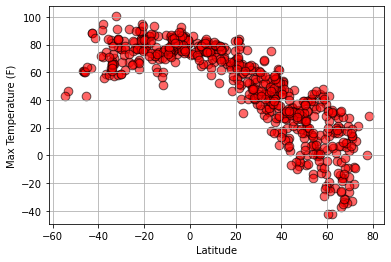

In [106]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Max temp'],marker ="o",c="red",edgecolors="black",s=75, alpha=0.6)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig("Output/LatVsTemp.png")
plt.show()


## Latitude vs. Humidity Plot

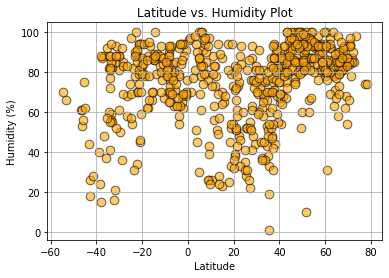

In [111]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Humidity'],marker ="o",c="orange",edgecolors="black",s=75, alpha=0.6)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title ('Latitude vs. Humidity Plot')
plt.grid()
plt.savefig("Output/LatVsHumidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

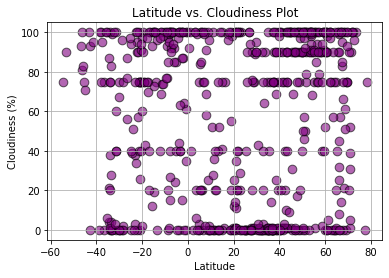

In [115]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Cloudiness'],marker ="o",c="purple",edgecolors="black",s=75, alpha=0.6)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title ('Latitude vs. Cloudiness Plot')
plt.savefig("Output/LatVsCloudiness.png")
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

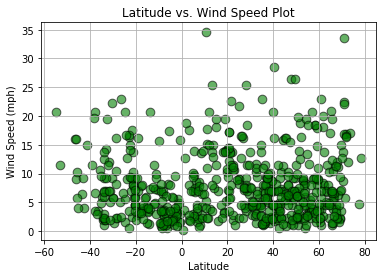

In [116]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Wind Speed'],marker ="o",c="green",edgecolors="black",s=75, alpha=0.6)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title ('Latitude vs. Wind Speed Plot')
plt.grid()
plt.savefig("Output/LatVsWind_Speed.png")
plt.show()

## Linear Regression

In [91]:
clean_city_data

,City,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,46.40,66,90,11.50,CL,1610327488
1,Tiznit Province,29.5833,-9.5000,46.92,83,95,6.42,MA,1610327489
2,Saskylakh,71.9167,114.0833,-8.48,87,100,16.80,RU,1610327490
3,Ushuaia,-54.8000,-68.3000,42.80,70,75,20.71,AR,1610327317
4,Nikolskoye,59.7035,30.7861,3.99,78,0,8.95,RU,1610327493
...,...,...,...,...,...,...,...,...,...
589,Buarcos,40.1660,-8.8768,44.01,69,0,4.61,PT,1610328946
590,Aswān,24.0934,32.9070,61.14,60,0,8.81,EG,1610328948
591,Panguna,-6.3164,155.4848,80.85,76,94,1.77,PG,1610328949
592,San Quintín,30.4833,-115.9500,60.15,59,3,7.56,MX,1610328950


In [92]:
NH_data=clean_city_data.loc[clean_city_data['Lat']>=0,:]
len(NH_data)

413

In [93]:
SH_data=clean_city_data.loc[clean_city_data['Lat']<0,:]
len(SH_data)

181

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7168657528141673


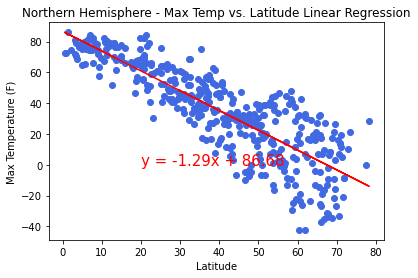

In [118]:
x_values=NH_data['Lat']
y_values=NH_data['Max temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker ="o",c="royalblue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,0),fontsize=15,color="red") 
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title ('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.savefig("Output/NH_LatVsTemp.png")
print(f"The r-value is: {rvalue**2}")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.14871872506619674


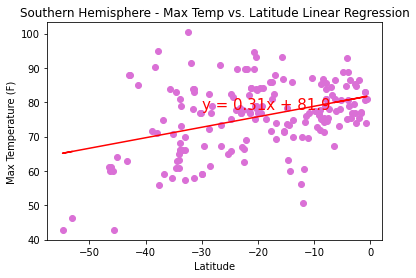

In [120]:
x_values=SH_data['Lat']
y_values=SH_data['Max temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker ="o",c="orchid")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,78),fontsize=15,color="red") 
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title ('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.savefig("Output/SH_LatVsTemp.png")
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.13298472170898282


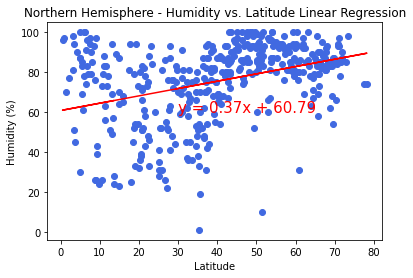

In [121]:
x_values=NH_data['Lat']
y_values=NH_data['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker ="o",c="royalblue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,60),fontsize=15,color="red") 
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title ('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.savefig("NH_LatVsHumidity.png")
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.12273417213173883


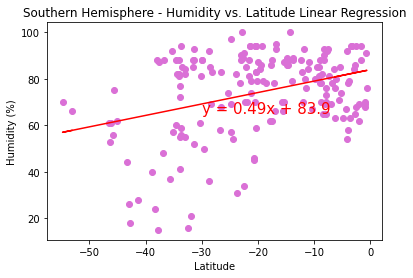

In [122]:
x_values=SH_data['Lat']
y_values=SH_data['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker ="o",c="orchid")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,65),fontsize=15,color="red") 
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title ('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.savefig("Output/SH_LatVsHumidity.png")
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.06105359313936644


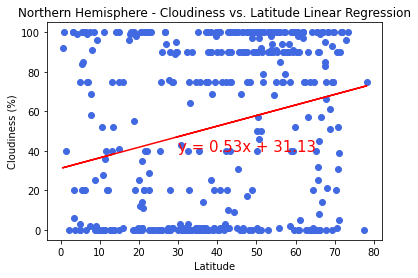

In [123]:
x_values=NH_data['Lat']
y_values=NH_data['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker ="o",c="royalblue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,40),fontsize=15,color="red") 
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title ('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.savefig("Output/NH_LatVsCloudiness.png")
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.01816068463266852


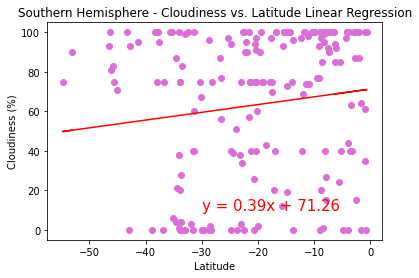

In [124]:
x_values=SH_data['Lat']
y_values=SH_data['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker ="o",c="orchid")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,10),fontsize=15,color="red") 
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title ('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.savefig("Output/SH_LatVsCloudiness.png")
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 6.638810005407812e-05


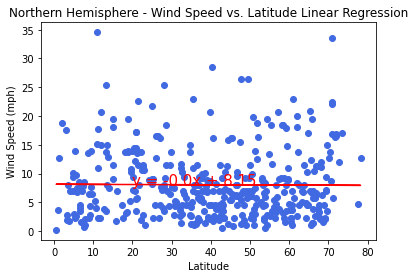

In [125]:
x_values=NH_data['Lat']
y_values=NH_data['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker ="o",c="royalblue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,8),fontsize=15,color="red") 
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title ('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.savefig("Output/NH_LatVsWindSpeed.png")
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.13574487288830356


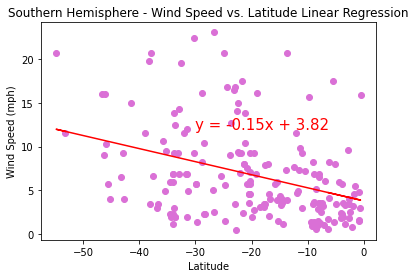

In [126]:
x_values=SH_data['Lat']
y_values=SH_data['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker ="o",c="orchid")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,12),fontsize=15,color="red") 
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title ('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.savefig("Output/SH_LatVsWindSpeed.png")
print(f"The r-value is: {rvalue**2}")
plt.show()